In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from modules.get_df_for_preprocessing import GetDfForPreprocessing

## Local modules import

In [2]:
from modules.utility import get_csv_data
from modules.customer_behavior import get_season_df, get_perod_bf_season, get_perod_aft_season, get_day_name
from modules.create_viz import plot_purchase_behv

## Read data

In [3]:
# read train data
train = get_csv_data(path='data/train.csv', version='v1')
# read test data
test = get_csv_data(path='data/test.csv', version='v1')
# read store data
store = get_csv_data(path='data/store.csv', version='v1')

Reading data from dvc source....
Reading completed, data returned
Reading data from dvc source....
Reading completed, data returned
Reading data from dvc source....
Reading completed, data returned


## Get data info

In [4]:
#training data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
#training data description
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
#test data description
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [8]:
#store data info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#store data description
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Working on date columns

In [10]:
#Convert date columns to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#get name of the day of the week
train['Day'] = train['DayOfWeek'].apply(get_day_name)
test['Day'] = test['DayOfWeek'].apply(get_day_name)

## Get season dataframes

In [11]:
# Public holidays dataframes
public_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='a')
public_holiday_bf = get_perod_bf_season(train_df=train, season_df=public_holiday, days_bf=5)
public_holiday_aft = get_perod_aft_season(train_df=train, season_df=public_holiday, days_aft=5)

2021-07-28 15:26:47,414 - Retrieving season index...
2021-07-28 15:26:48,248 - Extracting season data...
2021-07-28 15:26:48,437 - Process completed data returned.


In [12]:
# Easter holidays dataframes
easter_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='b')
easter_holiday_bf = get_perod_bf_season(train_df=train, season_df=easter_holiday, days_bf=5)
easter_holiday_aft = get_perod_aft_season(train_df=train, season_df=easter_holiday, days_aft=5)

2021-07-28 15:28:42,764 - Retrieving season index...
2021-07-28 15:28:43,145 - Extracting season data...
2021-07-28 15:28:43,335 - Process completed data returned.


In [13]:
# Christmas holidays dataframes
xmas_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='c')
xmas_holiday_bf = get_perod_bf_season(train_df=train, season_df=xmas_holiday, days_bf=5)
xmas_holiday_aft = get_perod_aft_season(train_df=train, season_df=xmas_holiday, days_aft=5)

2021-07-28 15:30:17,288 - Retrieving season index...
2021-07-28 15:30:17,918 - Extracting season data...
2021-07-28 15:30:18,074 - Process completed data returned.


## Compare purcasing behavior befpre, during and after holidays

2021-07-28 15:31:37,368 - NumExpr defaulting to 4 threads.
2021-07-28 15:31:40,584 - Plot saved as public_hol_bhv.jpg in img directory


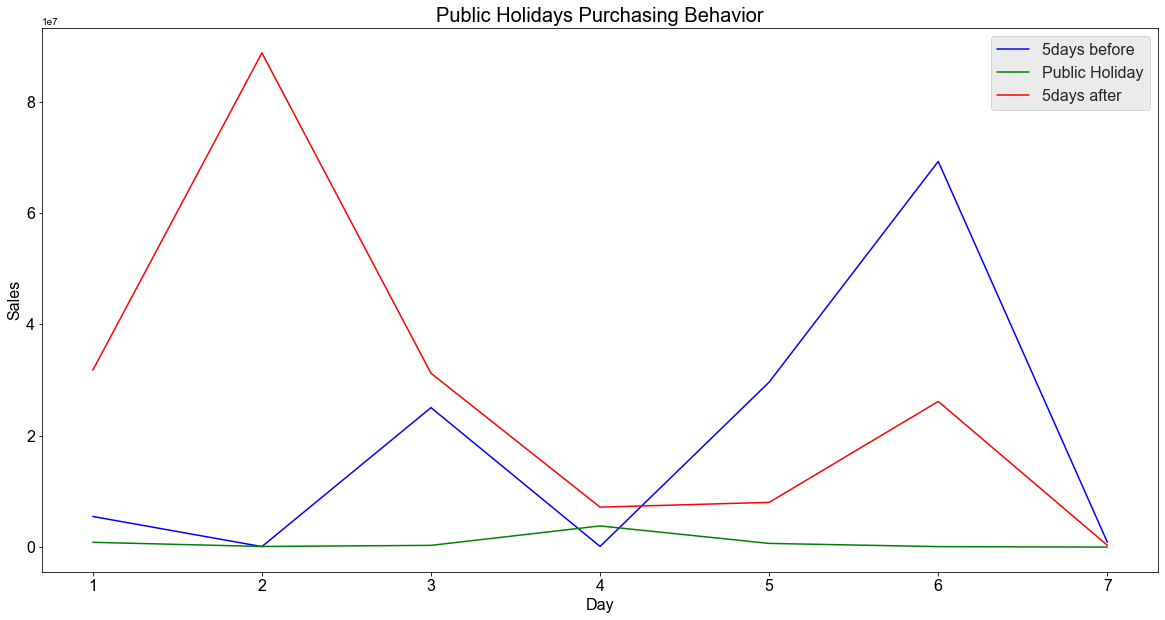

In [14]:
# Public holidays 
plot_purchase_behv(bf_df=public_holiday_bf, dur_df=public_holiday, aft_df=public_holiday_aft, title='Public Holidays Purchasing Behavior', save_path='public_hol_bhv.jpg')

2021-07-28 15:31:44,003 - Plot saved as easter_hol_bhv.jpg in img directory


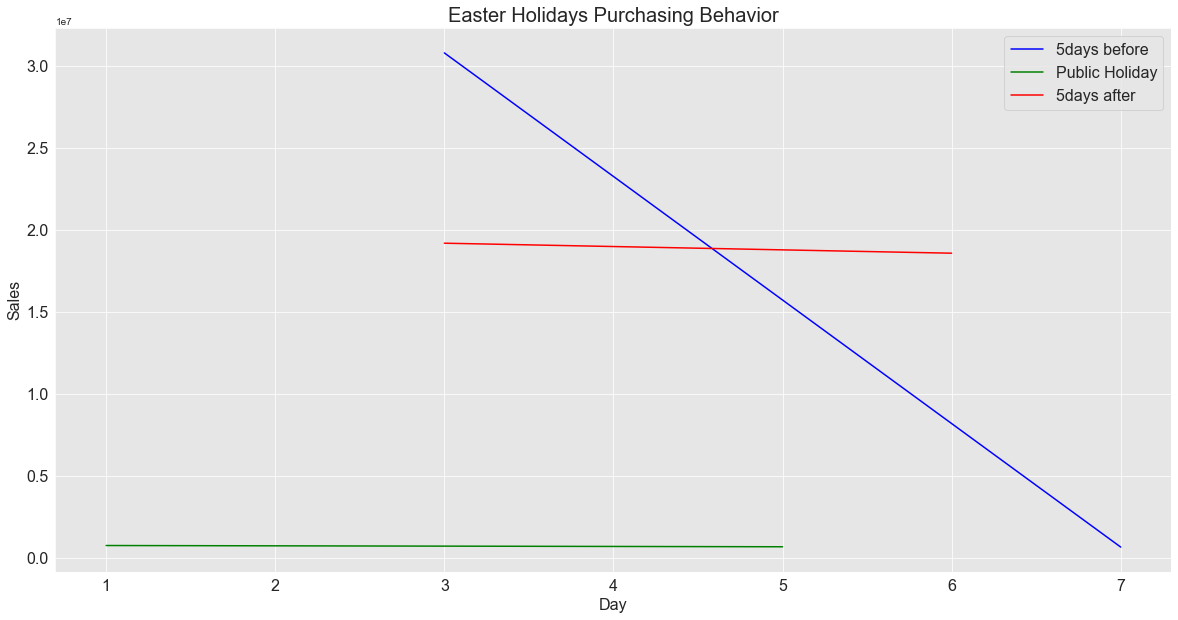

In [15]:
# Easter holidays 
plot_purchase_behv(bf_df=easter_holiday_bf, dur_df=easter_holiday, aft_df=easter_holiday_aft, title='Easter Holidays Purchasing Behavior', save_path='easter_hol_bhv.jpg')

2021-07-28 15:31:46,983 - Plot saved as christmas_hol_bhv.jpg in img directory


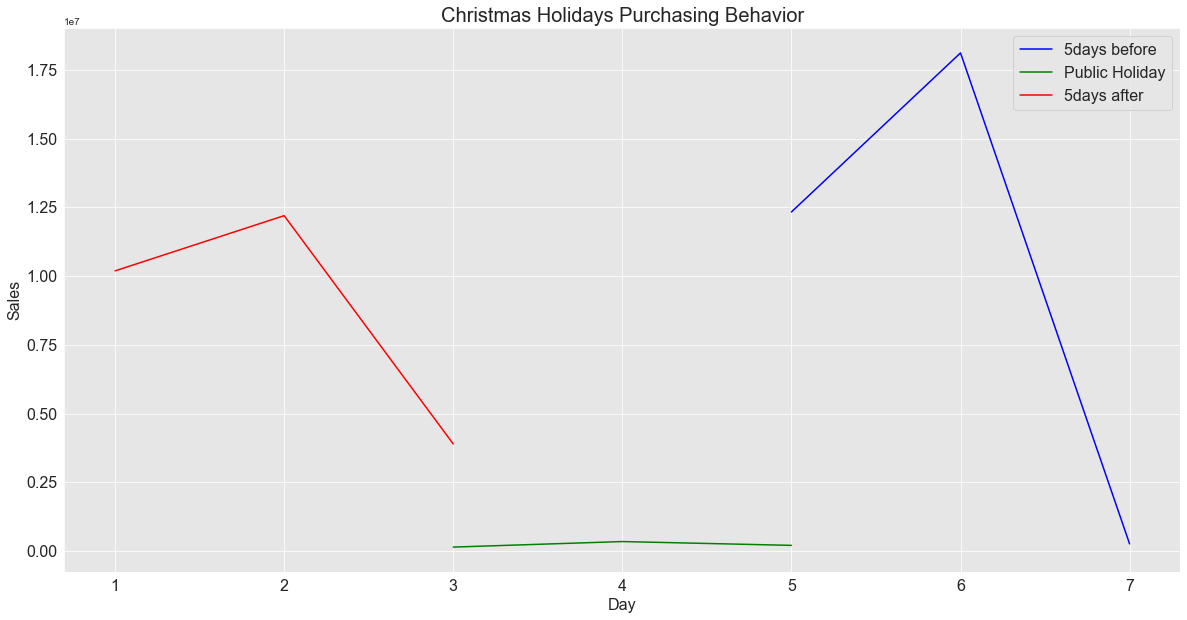

In [16]:
# Christmas holidays 
plot_purchase_behv(bf_df=xmas_holiday_bf, dur_df=xmas_holiday, aft_df=xmas_holiday_aft, title='Christmas Holidays Purchasing Behavior', save_path='christmas_hol_bhv.jpg')

## Merge training and test dataframes with store dataframe

In [17]:
# Merging store and train data set
store_train_df = store.merge(train,on=["Store"],how="inner")

In [18]:
# Merging store and test data set
store_test_df = store.merge(test,on=["Store"],how="inner")

## Getting the relationhip between features

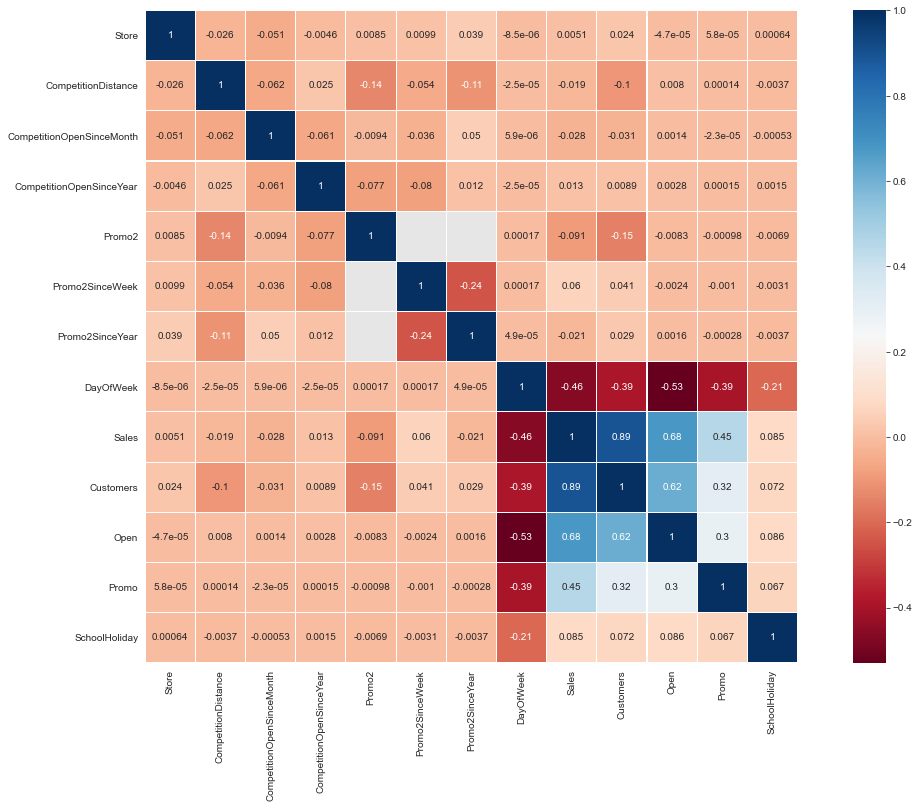

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(store_train_df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.savefig('img/corr.jpg')

## Get info and clean

In [20]:
train_prep = GetDfForPreprocessing(store_train_df)

In [21]:
train_prep.print_df_info()

Retrieving info from data...
The number of colum(s): 19.
The column(s) is/are : Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday and Day
 
The total number of rows: 1017209 
The number of columns having missing value(s): 6 
The number of rows with missing value(s) in [CompetitionDistance]: 2642
The number of rows with missing value(s) in [CompetitionOpenSinceMonth]: 323348
The number of rows with missing value(s) in [CompetitionOpenSinceYear]: 323348
The number of rows with missing value(s) in [Promo2SinceWeek]: 508031
The number of rows with missing value(s) in [Promo2SinceYear]: 508031
The number of rows with missing value(s) in [PromoInterval]: 508031


In [22]:
train_prep.drop_cols_abv_na_trshld(threshold = 0.35)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Dropping columns with missing values above the threshold ...

Dropping columns completed

Removing dropped columns from memory...

Removal of dropped columns from memory completed


In [23]:
train_inter_clean = train_prep.fill_missing()


The colums with missing values to be filled are ['CompetitionDistance', 'CompetitionOpenSinceYear']

Filling missing values in CompetitionDistance

Filling missing values in CompetitionOpenSinceYear

Filling missing values comppleted
